# Final Proyect: Predictive Modeling

We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a diagnosis is malignant or benignant. So now we will predict the whether a diagnosis is malignant or benignant using some great Classification Algorithms.Following are the algorithms we will use to make the model:

1. Logistic Regression

2. Support Vector Machines(Linear and radial)

3. Random Forest

4. K-Nearest Neighbours

5. Naive Bayes

6. Decision Tree

In [1]:
#importing all the required ML packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression #logistic regression

from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.neural_network import MLPClassifier # Neural Network
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

from sklearn.metrics import roc_curve, auc, accuracy_score
from scipy import interp

from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
#loading the data
df = pd.read_csv('data.csv')

In [3]:
# Drop useless variables
df = df.drop(['Unnamed: 32','id'],axis = 1)

# Reassign target
df.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

In [4]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Cross Validation

We divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts. We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm. An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

In [5]:
X = df.loc[:, df.columns != 'diagnosis']
y = df['diagnosis']

In [6]:
# Models 
classifiers=['Linear Svm',
             'Radial Svm',
             'Logistic Regression',
             'KNN',
             'Decision Tree',
             'Naive Bayes',
             'Random Forest', 
             'Neural Network']

models=[svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        LogisticRegression(),
        KNeighborsClassifier(n_neighbors=9),
        DecisionTreeClassifier(),
        GaussianNB(),
        RandomForestClassifier(n_estimators=100),
        MLPClassifier(alpha=1, max_iter=1000)]

In [27]:
kfold = StratifiedKFold(n_splits=5, shuffle = True ,random_state=2019) # k=5, split the data into 5 equal parts

accuracy=[]  # the accuracy score for the 5 folds of each model
std=[]       # the standard deviation for the 5 folds of each model
aucs = []    # the mean roc_auc for the 5 folds of each model
tprs = []
summary = []
mean_fpr = np.linspace(0, 1, 100)  # >>>|!|<<<
for i, model in enumerate (models):
    accuracy=[]
    for train, test in kfold.split(X, y):
        model_0 = model
        model_fit = model_0.fit(X.iloc[train],y.iloc[train])
        probas_ = model_0.predict(X.iloc[test])
        #print(probas_)
        # Compute ROC curve and area under the curve
        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_)  # roc_curve values for iteration
        # tpr
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        
        # AUC
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        # Accuaracy
        accuracy.append(accuracy_score(y.iloc[test], probas_))   # >>>|!|<<<
        
    # tpr    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0       # >>>|!|<<<
    
    # AUC
    mean_auc = auc(mean_fpr, mean_tpr) # >>>|!|<<<
    std_auc = np.std(aucs)   # >>>|!|<<<
    
    summary_0 =[classifiers[i], mean_tpr, mean_auc, std_auc, accuracy]
    summary.append(summary_0)   

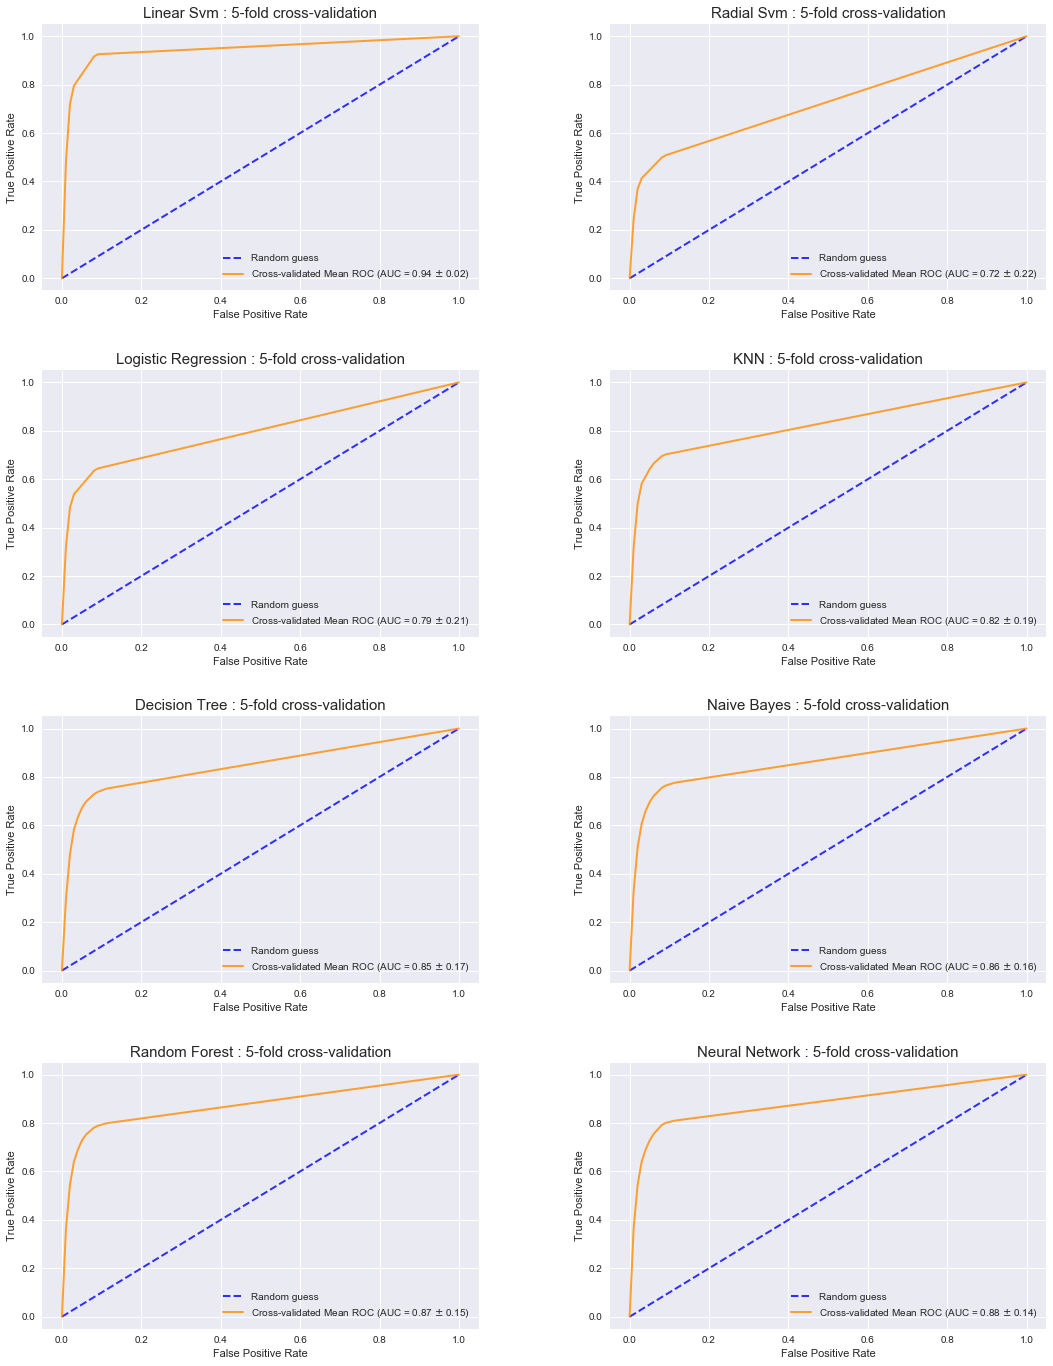

In [8]:
plt.figure(figsize=(18,24))
for i , classifier in enumerate(classifiers):
    roc_plot = summary[i]
    plt.subplot(4,2,i+1)
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='blue', label='Random guess', alpha=.8)
    plt.plot(mean_fpr, roc_plot[1], color='darkorange', lw=2, alpha=.8,
             label=r'Cross-validated Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (roc_plot[2], roc_plot[3]))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.title('{} : 5-fold cross-validation'.format(roc_plot[0]), fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Classification accuracy')

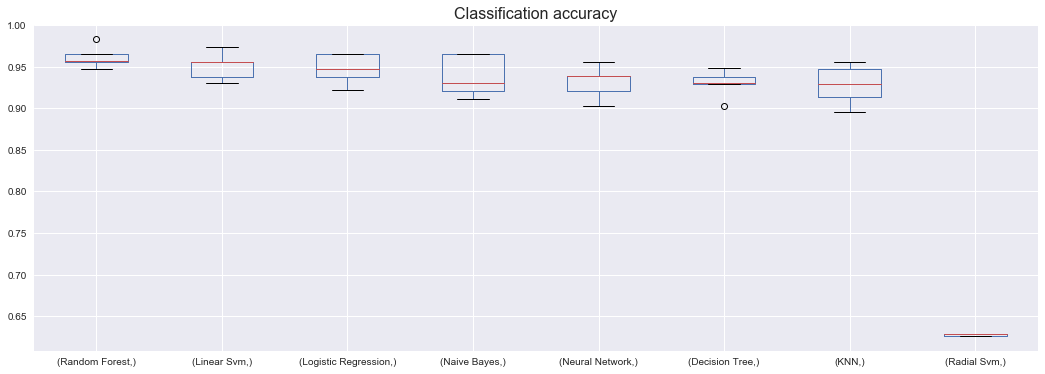

In [38]:
acc_box_0 = []
for i in summary:
    acc_box_0.append(i[4])
    
acc_box = pd.DataFrame(acc_box_0, index = [classifiers])
order = acc_box.T.mean().sort_values(ascending=False).index.tolist()
acc_box = acc_box.T[order]
plt.subplots(figsize=(18,6))
acc_box.boxplot()
plt.title('Classification accuracy', fontsize=16)